In [ ]:
#Library untuk pengelolahan data
import pandas as pd
import numpy as np

#Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk model Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()


Saving Case Study - Customer.csv to Case Study - Customer (3).csv
Saving Case Study - Product.csv to Case Study - Product (3).csv
Saving Case Study - Store.csv to Case Study - Store (3).csv
Saving Case Study - Transaction.csv to Case Study - Transaction (3).csv


In [ ]:
#Data Input
customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
product = pd.read_csv('Case Study - Product.csv', delimiter=';')
store = pd.read_csv('Case Study - Store.csv', delimiter=';')
transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


**Data Cleansing**

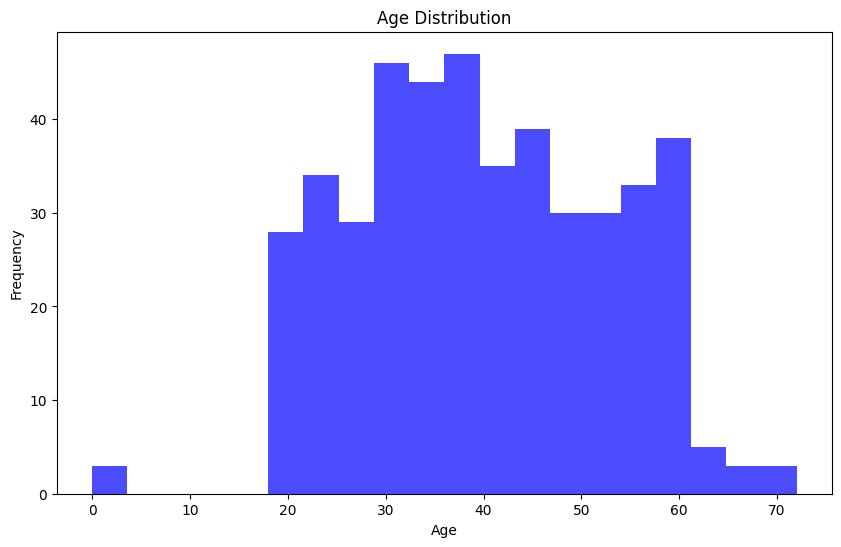

In [ ]:
#check if age values are reasonable
plt.figure(figsize=(10, 6))
plt.hist(customer['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Data Cleansing
# Check for missing values
product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [ ]:
store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [ ]:
customer = customer.dropna(subset=['Marital Status'])
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [ ]:
transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [ ]:
# Data Cleansing for Types
customer['Income'] = customer['Income']. replace('[,]','.', regex=True).astype('float')
store['Latitude'] = store['Latitude']. replace('[,]','.', regex=True).astype('float')
store['Longitude'] = store['Longitude']. replace('[,]','.', regex=True).astype('float')
transaction['Date'] = pd.to_datetime(transaction['Date'])

**Data Merge**

In [ ]:
merged_customer_transaction = pd.merge(transaction, customer, on=['CustomerID'])
merged_product_transaction = pd.merge(merged_customer_transaction, product, on=['ProductID'])
final_merged_data = pd.merge(merged_product_transaction, store, on=['StoreID'])

final_merged_data.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [ ]:
final_merged_data.isna().sum()

TransactionID     0
CustomerID        0
Date              0
ProductID         0
Price_x           0
Qty               0
TotalAmount       0
StoreID           0
Age               0
Gender            0
Marital Status    0
Income            0
Product Name      0
Price_y           0
StoreName         0
GroupStore        0
Type              0
Latitude          0
Longitude         0
dtype: int64

**Data Frame for Regression**

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import mean_squared_error

daily_sales = final_merged_data.groupby('Date').agg({'Qty': 'sum'}).reset_index()
daily_sales

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


**ARIMA Machine Learning Predictions : Predicting the quantity of sales from the overall Kalbe product.**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

X = daily_sales['Qty']
train_size = int(len(X))
train, test = train_test_split(daily_sales, test_size=0.2, shuffle=False)
train = train.set_index('Date')
test = test.set_index('Date')

arima_model = ARIMA(X, order=(40, 2, 1))
arima_model = arima_model.fit()
arima_model.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  365
Model:                ARIMA(40, 2, 1)   Log Likelihood               -1527.974
Date:                Wed, 16 Aug 2023   AIC                           3139.948
Time:                        12:51:07   BIC                           3303.512
Sample:                             0   HQIC                          3204.964
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9960      0.060    -16.584      0.000      -1.114      -0.878
ar.L2         -0.9591      0.089    -10.747      0.000      -1.134      -0.784
ar.L3         -0.8440      0.111     -7.621      0.000      -1.061      -0.627
ar.L4         -0.7695      0.128     -5.992      0.000      -1.021      -0.518
ar.L5         -0.7768      0.137     -5.668      0.000      -1.045      -0.508
ar.L6         -0.7832      0.149     -5.272      0.000      -1.074      -0.492
ar.L7         -0.7820      0.166     -4.709      0.000      -1.107      -0.456
ar.L8         -0.7012      0.174     -4.031      0.000      -1.042      -0.360
ar.L9         -0.6944      0.177     -3.923      0.000      -1.041      -0.347
ar.L10        -0.7183      0.180     -3.987      0.000      -1.071      -0.365
ar.L11        -0.6963      0.186     -3.745      0.000      -1.061      -0.332
ar.L12        -0.6818      0.196     -3.483      0.000      -1.065      -0.298
ar.L13        -0.7291      0.197     -3.692      0.000      -1.116      -0.342
ar.L14        -0.7557      0.205     -3.691      0.000      -1.157      -0.354
ar.L15        -0.7481      0.211     -3.540      0.000      -1.162      -0.334
ar.L16        -0.7987      0.217     -3.678      0.000      -1.224      -0.373
ar.L17        -0.7363      0.222     -3.321      0.001      -1.171      -0.302
ar.L18        -0.7408      0.220     -3.369      0.001      -1.172      -0.310
ar.L19        -0.7410      0.224     -3.311      0.001      -1.180      -0.302
ar.L20        -0.6929      0.227     -3.059      0.002      -1.137      -0.249
ar.L21        -0.6191      0.227     -2.732      0.006      -1.063      -0.175
ar.L22        -0.5221      0.228     -2.286      0.022      -0.970      -0.074
ar.L23        -0.4366      0.222     -1.964      0.049      -0.872      -0.001
ar.L24        -0.3812      0.216     -1.763      0.078      -0.805       0.043
ar.L25        -0.4415      0.206     -2.147      0.032      -0.845      -0.038
ar.L26        -0.4884      0.191     -2.551      0.011      -0.864      -0.113
ar.L27        -0.4606      0.187     -2.464      0.014      -0.827      -0.094
ar.L28        -0.2950      0.185     -1.597      0.110      -0.657       0.067
ar.L29        -0.2976      0.179     -1.665      0.096      -0.648       0.053
ar.L30        -0.2178      0.171     -1.272      0.203      -0.553       0.118
ar.L31        -0.1698      0.163     -1.042      0.297      -0.489       0.150
ar.L32        -0.1406      0.160     -0.879      0.380      -0.454       0.173
ar.L33        -0.2243      0.157     -1.428      0.153      -0.532       0.083
ar.L34        -0.1380      0.150     -0.918      0.359      -0.433       0.157
ar.L35        -0.1569      0.139     -1.129      0.259      -0.429       0.116
ar.L36        -0.0846      0.130     -0.648      0.517      -0.340       0.171
ar.L37         0.0205      0.121      0.169      0.866      -0.217       0.258
ar.L38         0.0170      0.111      0.153      0.878      -0.201       0.235
ar

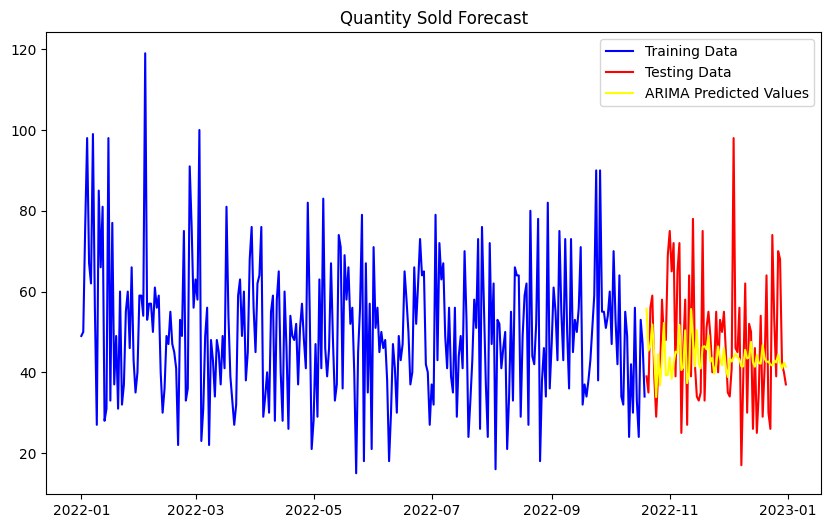

In [ ]:
get_forecast = arima_model.get_forecast(len(test))
forecast = get_forecast.conf_int()
forecast['predictions'] = arima_model.predict(start=forecast.index[0], end=forecast.index[-1])
forecast.index = test.index
forecast_pred = forecast['predictions']

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Qty'], color='blue', label='Training Data')
plt.plot(test.index, test['Qty'], color='red', label='Testing Data')
plt.plot(forecast_pred, color='yellow', label='ARIMA Predicted Values')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

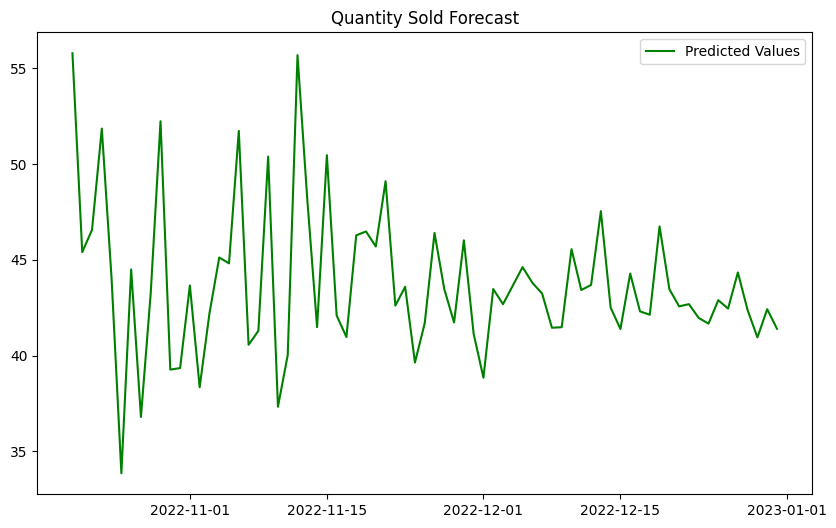

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(forecast_pred, color='green', label='Predicted Values')
plt.title('Quantity Sold Forecast')
plt.legend()
plt.show()

In [ ]:
mean_qty = forecast_pred.mean().round()
print(f"Quantity sold: {mean_qty}")

Quantity sold: 44.0


**From the forecast, average quantity of product sold in January 2023 is 44 product/day**

In [ ]:
product_daily_sales = final_merged_data.groupby(['ProductID', 'Product Name', 'Date'])[['Qty']].sum()
product_daily_sales = product_daily_sales.reset_index()

forecast_dataframe = pd.DataFrame()

for product_name, group in product_daily_sales.groupby('Product Name'):
    forecast_df_dum = group[['Date', 'Qty']]
    forecast_df_dum = forecast_df_dum.groupby('Date')[['Qty']].sum().reindex(pd.date_range(start='2022-01-01', end='2022-12-31'), fill_value=0)

    model = ARIMA(forecast_df_dum['Qty'], order=(40, 2, 1))
    model_fit = model.fit()
    forecast_period = test.shape[0]

    forecast = model_fit.forecast(steps=forecast_period)
    forecast_dataframe[product_name] = forecast.values

forecast_dataframe.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

,Cashew,Cheese Stick,Choco Bar,Coffee Candy,Crackers,Ginger Candy,Oat,Potato Chip,Thai Tea,Yoghurt
0,0.544542,7.108025,6.200945,3.345084,4.763075,4.421190,2.447686,4.557058,6.904503,6.221314
1,2.224291,3.844665,7.327615,2.717849,5.496608,7.121418,2.559733,4.855190,3.624595,4.580703
2,2.138368,3.606716,4.243041,4.063586,5.192499,7.460937,2.626599,2.338002,9.428336,3.625447
3,2.691718,8.079791,6.452586,4.779393,3.629036,6.332392,2.803826,2.470415,8.863551,3.976152
4,1.221557,6.981006,-1.873211,5.293755,6.757327,6.973647,1.693577,3.606503,7.147618,3.738717


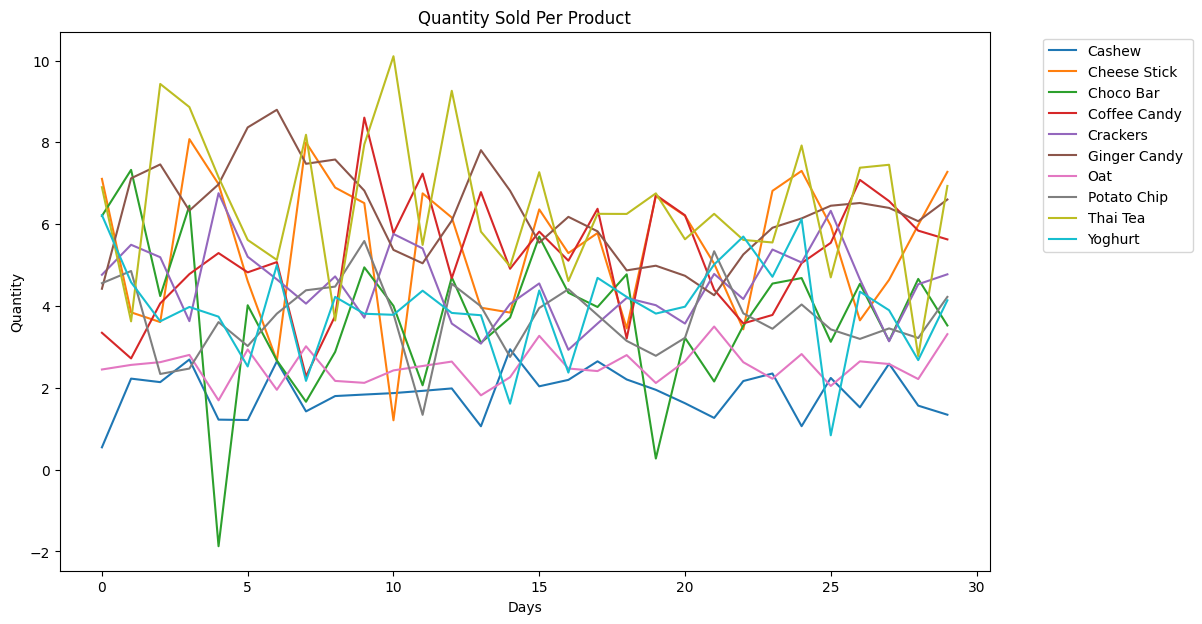

In [144]:
plt.figure(figsize=(12, 7))
for i in forecast_dataframe.columns:
    plt.plot(forecast_dataframe.index[:30], forecast_dataframe[i][:30], label=i)

plt.title('Quantity Sold Per Product')
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [149]:
mean_quantity_sold = forecast_dataframe.mean().round()
print(mean_quantity_sold)

Cashew           2.0
Cheese Stick     5.0
Choco Bar        4.0
Coffee Candy     5.0
Crackers         5.0
Ginger Candy     6.0
Oat              3.0
Potato Chip      4.0
Thai Tea         6.0
Yoghurt          4.0
dtype: float64


In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predicted_values = forecast_pred
actual_values = test

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate MAE
mae = mean_absolute_error(actual_values, predicted_values)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 15.83738906821292
MAE: 12.275857529750825


Predicted daily quantities sold for each individual product
* Cashew: 2 units
* Cheese Stick: 5 units
* Choco Bar: 4 units
* Coffee Candy: 5 units
* Crackers: 5 units
* Ginger Candy: 6 units
* Oat: 3 units
* Potato Chip: 4 units
* Thai Tea: 6 units
* Yoghurt: 4 units

The mean predicted quantity of sales for all these products combined is 44.0 units per day.

To conclude and provide inventory recommendations:

**Stock Quantity Planning:**

The inventory team should ensure that they have enough stock of each individual product to meet the predicted daily demand. For example, you would need at least 2 units of Cashew, 5 units of Cheese Stick, 4 units of Choco Bar, and so on, to cover the predicted sales for each product.

**Total Daily Stock:**

To fulfill the total daily demand for all products combined, the inventory team should aim to stock a total of 44 units (the mean predicted quantity) of each product daily. This ensures that you have sufficient inventory to meet the overall demand for the entire product range.

Keep a close eye on actual sales data and adjust stock levels accordingly. If certain products consistently sell more or less than predicted, make adjustments to the stock quantities to optimize inventory levels.

 **Clustering : Create customer segments that will be utilized by the marketing team for tailored promotions and sales strategies.**

**Create Data Frame Clustering**

In [166]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clustering = final_merged_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()


In [174]:
# keeping only the two last columns
X = clustering.iloc[:, -2:]

num_clusters = 4

k_means = KMeans(n_clusters=num_clusters, n_init=12)
k_means.fit(X)
labels = k_means.labels_

clustering["Labels"] = labels
clustering.head()

,CustomerID,TransactionID,Qty,TotalAmount,Labels
0,1,17,60,623300,0
1,2,13,57,392300,3
2,3,15,56,446200,3
3,4,10,46,302500,1
4,5,7,27,268600,1


In [175]:
clustering.groupby('Labels').mean()

,CustomerID,TransactionID,Qty,TotalAmount
Labels,,,,
0,207.642857,15.910714,60.392857,584526.785714
1,219.493421,10.414474,37.263158,316792.763158
2,258.969388,7.448980,25.867347,206380.612245
3,209.340580,12.840580,47.420290,430850.724638


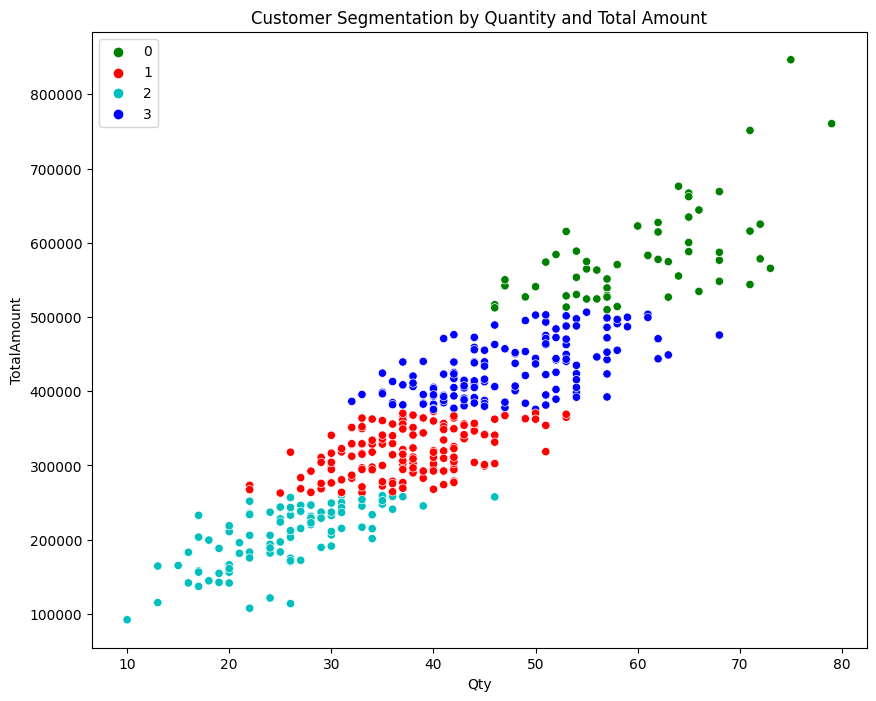

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(x=clustering['Qty'], y=clustering['TotalAmount'], hue=clustering['Labels'], palette=['g', 'r', 'c', 'b'])
plt.title('Customer Segmentation by Quantity and Total Amount')
plt.legend()
plt.show()

In [177]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)

0.5223280434587017

Upon analyzing the clustering results, it's evident that our customer data has been divided into four distinct clusters, each with its own unique characteristics. Leveraging these insights, we can develop personalized promotion and sales strategies tailored to the preferences and behaviors of each cluster.

**Cluster 0: High-Value and Frequent**

Cluster 0 consists of customers who exhibit substantial engagement with our brand. They make frequent purchases and contribute significantly to our revenue.

Strategies:
* Recognize and Reward Loyalty with Exclusive Discounts
* Introduce a VIP Loyalty Program with Premium Benefits
* Provide Early Access to New Products and Special Offers

**Cluster 1: Moderate Buyers with Potential Customers**

Cluster 1 demonstrate moderate purchase behavior, indicating they might be interested in exploring more products or offers.

Strategies:
* Offer Bundle Deals to Encourage Upselling
* Implement a Tiered Loyalty Program to Incentivize Higher Spending
* Provide Personalized Recommendations Based on Past Purchases

**Cluster 2: Occasional and Value-Conscious Shoppers**

Cluster 2 represents customers who make occasional purchases, often with a focus on value and discounts.

Strategies:
* Present Limited-Time Offers with Attractive Discounts
* Highlight Cost-Effective Bundles and Packages
* Send Personalized Emails with Exclusive Deals to Drive Engagement

**Cluster 3: Engaged Customers with Potential for Growth Customers**

Cluster 3 show engagement potential and might be open to exploring additional offerings.

Strategies:
* Implement a Welcome Back Campaign for Returning Customers
* Suggest Complementary Products Based on Their Previous Purchases
* Provide Incentives for Referrals to Expand Customer Base
